# **Author : Apurv Kalane**

# Task 4 : Exploratory Data Analysis - Terrorism 

**Importing the required library**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Data Visualization**

In [46]:
from google.colab import files
uploaded = files.upload()

In [47]:
data = pd.read_csv("globalterrorismdb_0718dist.csv" , encoding = 'latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [48]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [49]:
data.rename(columns = {'iyear':'Year' , 'imonth':'Month' , 'iday':'Day' , 'gname':'Group' , 'country_txt':'Country' , 'region_txt':'Region' , 'provstate':'State' , 'city':'City' , 'latitude':'Latitude' ,
                       'longitude':'Longitude' , 'summary':'Summary' , 'attacktype1_txt':'AttackType' , 'targtype1_txt':'TargetType' , 'weaptype1_txt':'Weapon' , 'nkill':'Kill' , 'nwound':'Wound'} , inplace = True)

In [50]:
data = data[['Year' , 'Month' , 'Day' , 'Country' , 'State' , 'Region' , 'City' , 'Latitude' , 'Longitude' , 'AttackType' , 'Kill' , 'Wound' , 'target1' , 'Summary' , 'Group' , 'TargetType' , 'Weapon' , 'motive']]

In [51]:
data.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Kill,Wound,target1,Summary,Group,TargetType,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [52]:
data.shape

(23227, 18)

In [53]:
data.isnull().sum()

Year              0
Month             0
Day               0
Country           0
State           101
Region            0
City              0
Latitude       1097
Longitude      1097
AttackType        0
Kill           4566
Wound          6208
target1         232
Summary       22223
Group             0
TargetType        0
Weapon            0
motive        22493
dtype: int64

In [54]:
data['Wound'] = data['Wound'].fillna(0)
data['Kill'] = data['Kill'].fillna(0)
data['Casualities'] = data['Kill'] + data['Wound']

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23227 entries, 0 to 23226
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         23227 non-null  int64  
 1   Month        23227 non-null  int64  
 2   Day          23227 non-null  int64  
 3   Country      23227 non-null  object 
 4   State        23126 non-null  object 
 5   Region       23227 non-null  object 
 6   City         23227 non-null  object 
 7   Latitude     22130 non-null  float64
 8   Longitude    22130 non-null  float64
 9   AttackType   23227 non-null  object 
 10  Kill         23227 non-null  float64
 11  Wound        23227 non-null  float64
 12  target1      22995 non-null  object 
 13  Summary      1004 non-null   object 
 14  Group        23227 non-null  object 
 15  TargetType   23227 non-null  object 
 16  Weapon       23227 non-null  object 
 17  motive       734 non-null    object 
 18  Casualities  23227 non-null  float64
dtypes: f

In [56]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound,Casualities
count,23227.000000,23227.000000,23227.000000,22130.000000,2.213000e+04,23227.000000,23227.000000,23227.000000
mean,1979.472037,6.222672,15.105782,23.162967,-3.926850e+03,1.646231,1.096612,2.742842
std,3.666044,3.372561,8.939002,24.348219,5.793558e+05,8.334432,8.786799,13.126256
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1978.000000,3.000000,7.000000,12.842650,-8.601722e+01,0.000000,0.000000,0.000000
50%,1980.000000,6.000000,15.000000,31.147131,-5.618721e+01,0.000000,0.000000,0.000000
75%,1982.000000,9.000000,23.000000,41.930607,9.149022e+00,1.000000,0.000000,1.000000
max,1986.000000,12.000000,31.000000,64.837778,1.747763e+02,422.000000,700.000000,760.000000


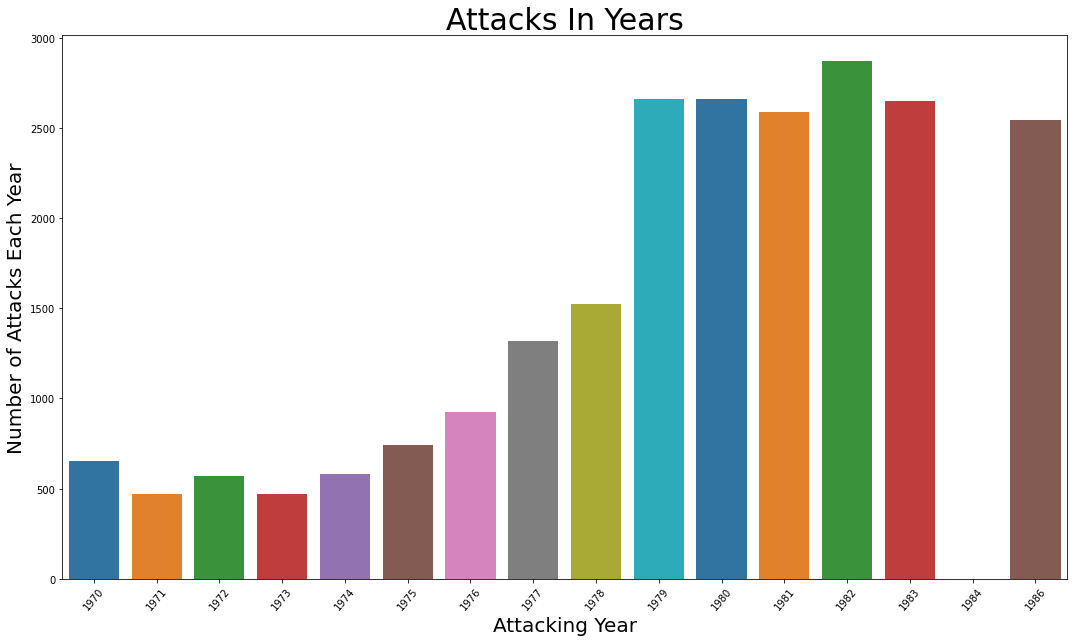

In [57]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year , y = years_count , palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year' , fontsize = 20)
plt.ylabel('Number of Attacks Each Year' , fontsize = 20)
plt.title('Attacks In Years' , fontsize = 30)
plt.show()

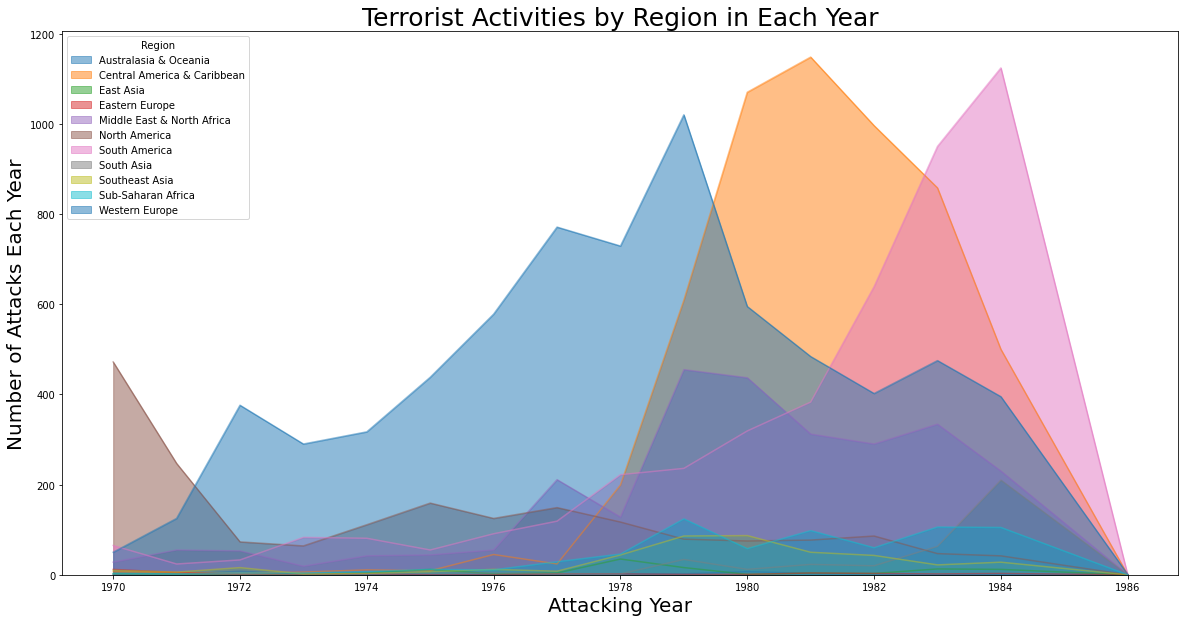

In [58]:
pd.crosstab(data.Year , data.Region).plot(kind = 'area' , stacked = False , figsize = (20,10))
plt.title('Terrorist Activities by Region in Each Year' , fontsize = 25)
plt.ylabel('Number of Attacks Each Year' , fontsize = 20)
plt.xlabel('Attacking Year' , fontsize = 20)
plt.show()

In [59]:
attack = data.Country.value_counts()[:10]
attack

El Salvador       2917
United Kingdom    2327
United States     1777
Spain             1574
Peru              1545
Colombia          1393
Guatemala         1329
Italy             1240
Nicaragua          957
France             922
Name: Country, dtype: int64

In [60]:
data.Group.value_counts()[1:10]

Irish Republican Army (IRA)                         1525
Shining Path (SL)                                   1223
Farabundo Marti National Liberation Front (FMLN)    1098
Basque Fatherland and Freedom (ETA)                  907
Palestinians                                         469
Revolutionary Armed Forces of Colombia (FARC)        402
Nicaraguan Democratic Force (FDN)                    371
M-19 (Movement of April 19)                          321
Movement of the Revolutionary Left (MIR) (Chile)     240
Name: Group, dtype: int64

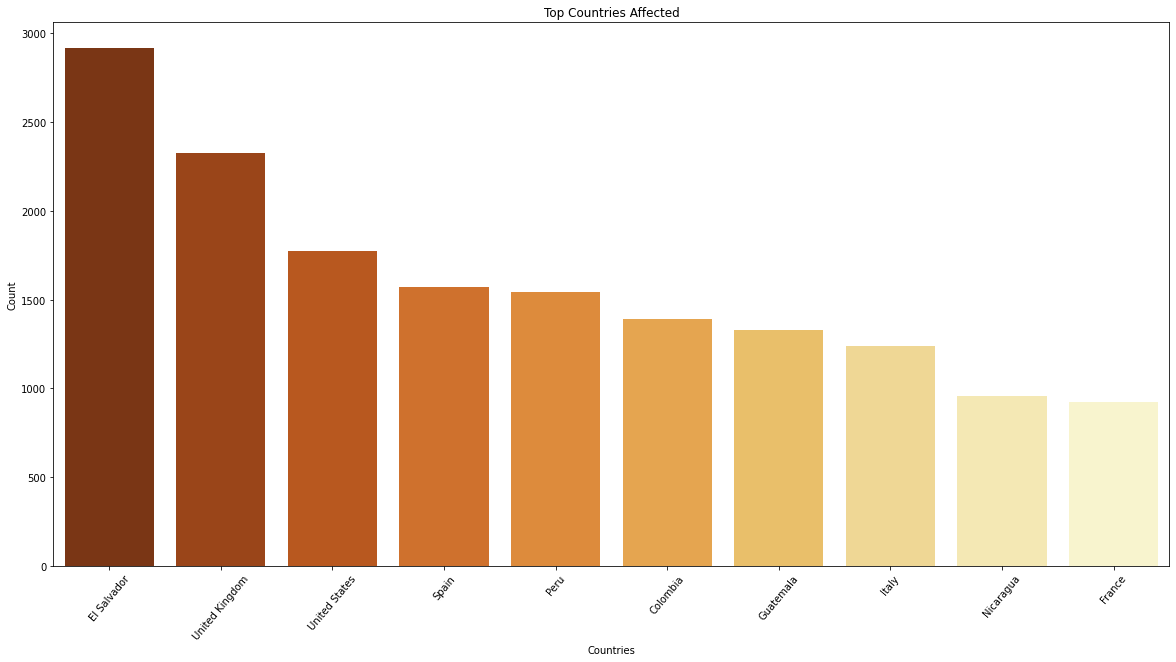

In [61]:
plt.subplots(figsize = (20,10))
sns.barplot(data['Country'].value_counts()[:10].index , data['Country'].value_counts()[:10].values , palette = 'YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

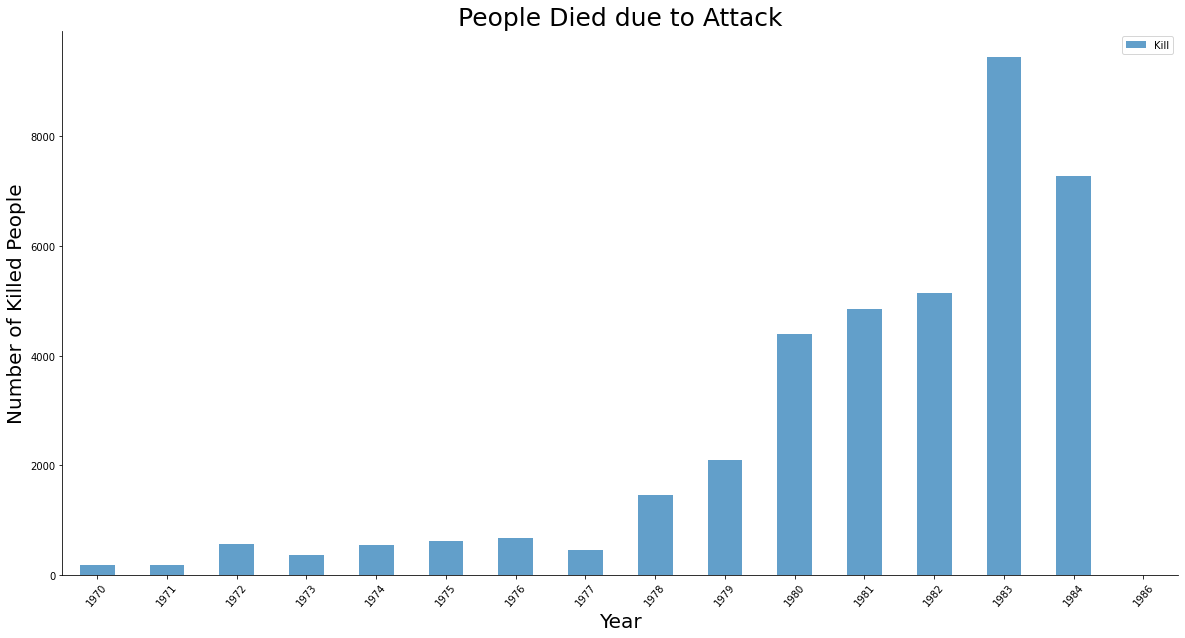

In [62]:
df = data[['Year' , 'Kill']].groupby(['Year']).sum()
fig , ax4 = plt.subplots(figsize = (20,10))
df.plot(kind = 'bar' , alpha = 0.7 , ax = ax4)
plt.xticks(rotation = 50)
plt.title('People Died due to Attack' , fontsize = 25)
plt.ylabel('Number of Killed People' , fontsize = 20)
plt.xlabel('Year' , fontsize = 20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

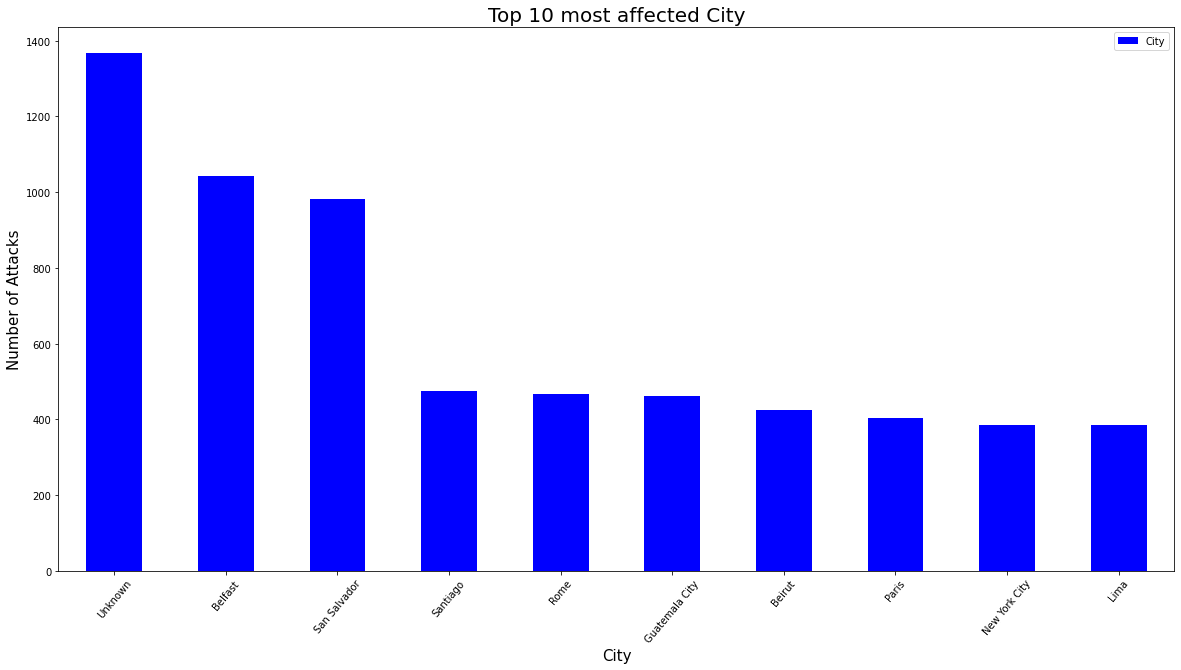

In [63]:
data['City'].value_counts().to_frame().sort_values('City' , axis = 0 , ascending = False).head(10).plot(kind = 'bar' , figsize = (20,10) , color = 'Blue')
plt.xticks(rotation = 50)
plt.xlabel('City' , fontsize = 15)
plt.ylabel('Number of Attacks' , fontsize = 15)
plt.title('Top 10 most affected City' , fontsize = 20)
plt.show()

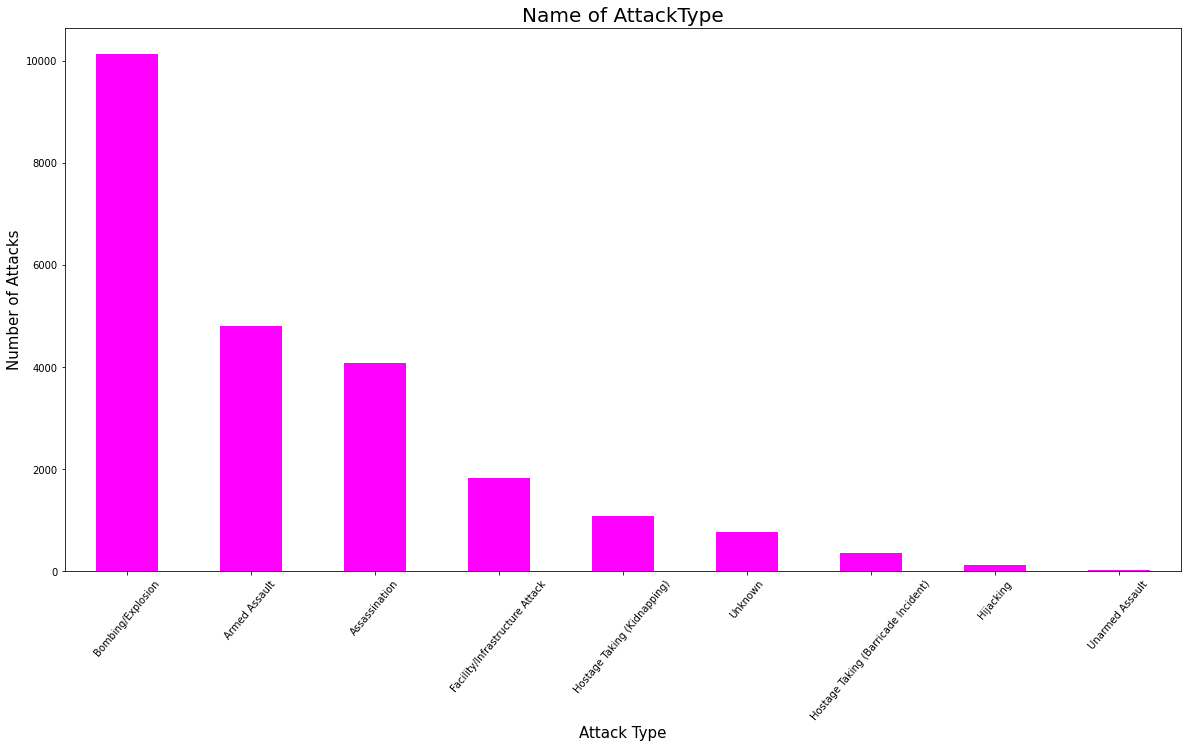

In [64]:
data['AttackType'].value_counts().plot(kind = 'bar' , figsize = (20,10) , color = 'Magenta')
plt.xticks(rotation = 50)
plt.xlabel('Attack Type' , fontsize = 15)
plt.ylabel('Number of Attacks' , fontsize = 15)
plt.title('Name of AttackType' , fontsize = 20)
plt.show()

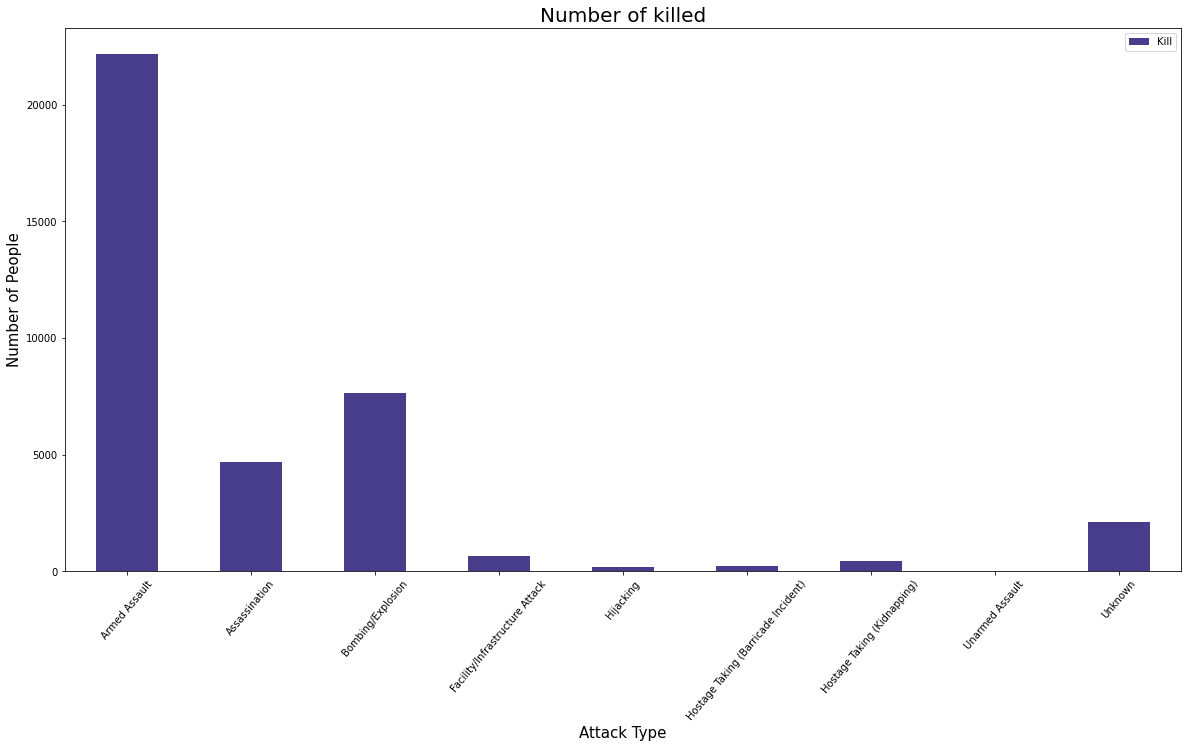

In [65]:
data[['AttackType' , 'Kill']].groupby(["AttackType"] , axis = 0).sum().plot(kind = 'bar' , figsize = (20,10) , color = 'darkslateblue')
plt.xticks(rotation = 50)
plt.xlabel('Attack Type' , fontsize = 15)
plt.ylabel('Number of People' , fontsize = 15)
plt.title('Number of killed' , fontsize = 20)
plt.show()

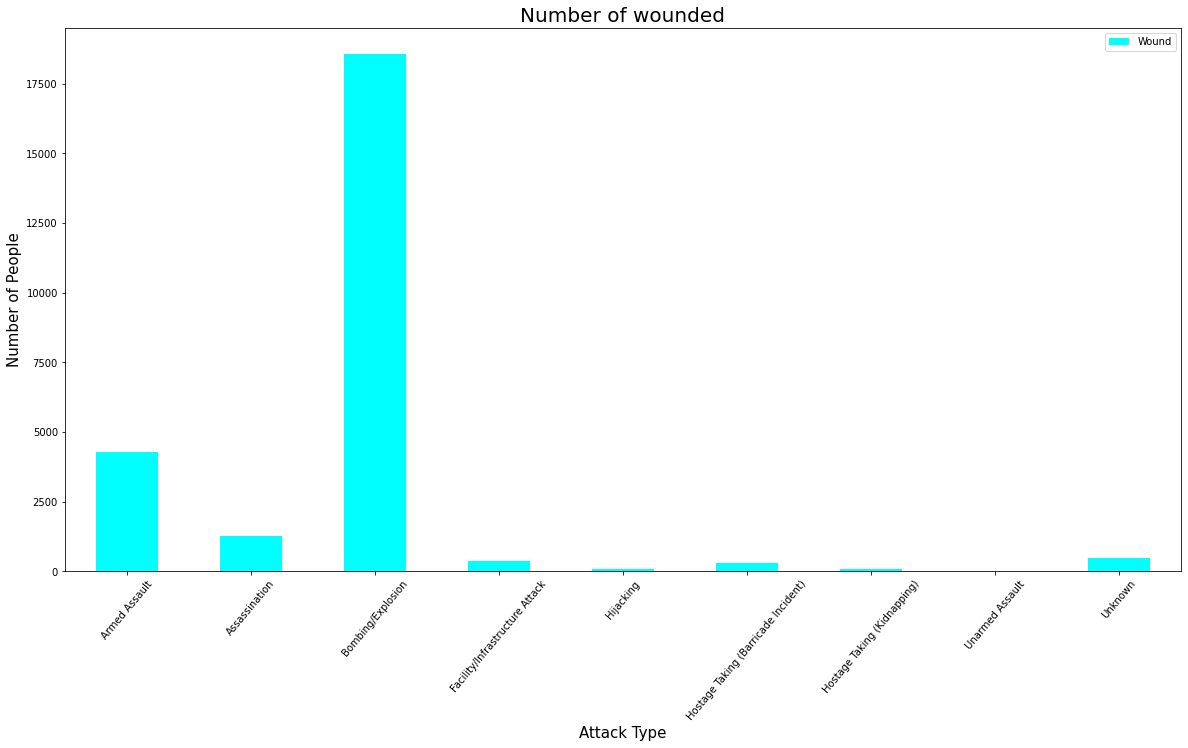

In [66]:
data[['AttackType' , 'Wound']].groupby(["AttackType"] , axis = 0).sum().plot(kind = 'bar' , figsize = (20,10) , color = 'Cyan')
plt.xticks(rotation = 50)
plt.xlabel('Attack Type' , fontsize = 15)
plt.ylabel('Number of People' , fontsize = 15)
plt.title('Number of wounded' , fontsize = 20)
plt.show()

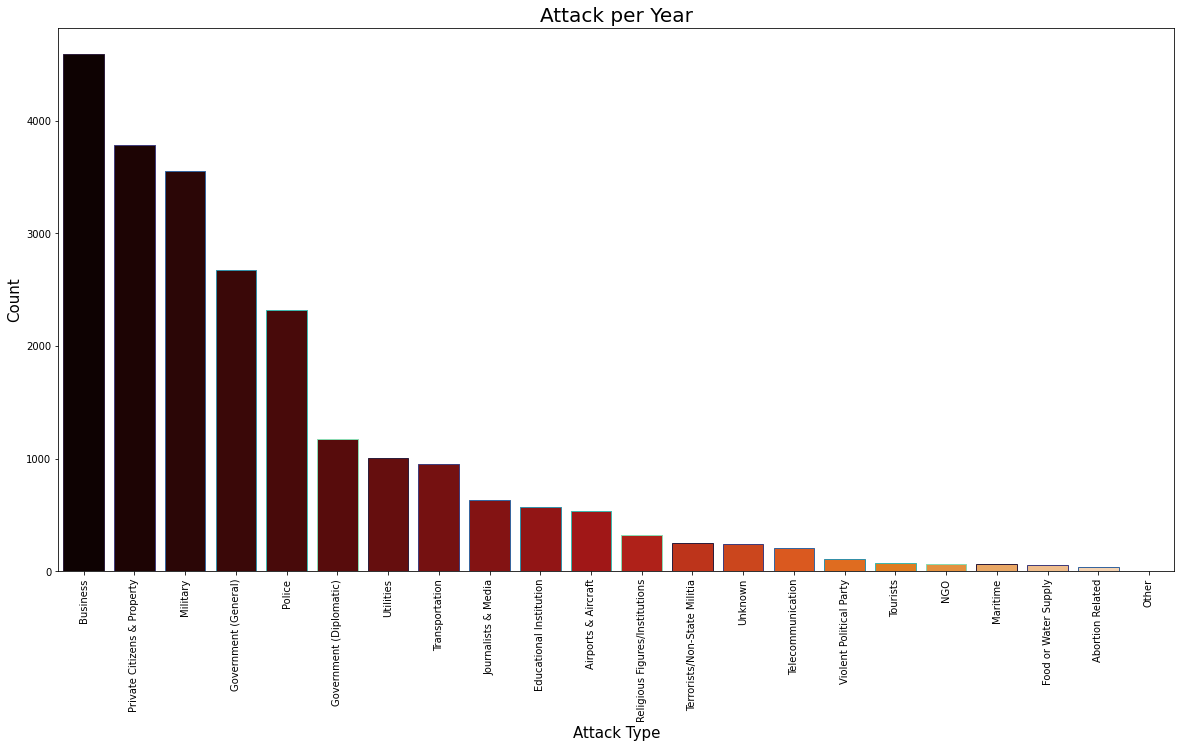

In [67]:
plt.subplots(figsize = (20,10))
sns.countplot(data['TargetType'] , order = data['TargetType'].value_counts().index , palette = 'gist_heat' , edgecolor = sns.color_palette("mako"));
plt.xticks(rotation = 90)
plt.xlabel('Attack Type' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)
plt.title('Attack per Year' , fontsize = 20)
plt.show()

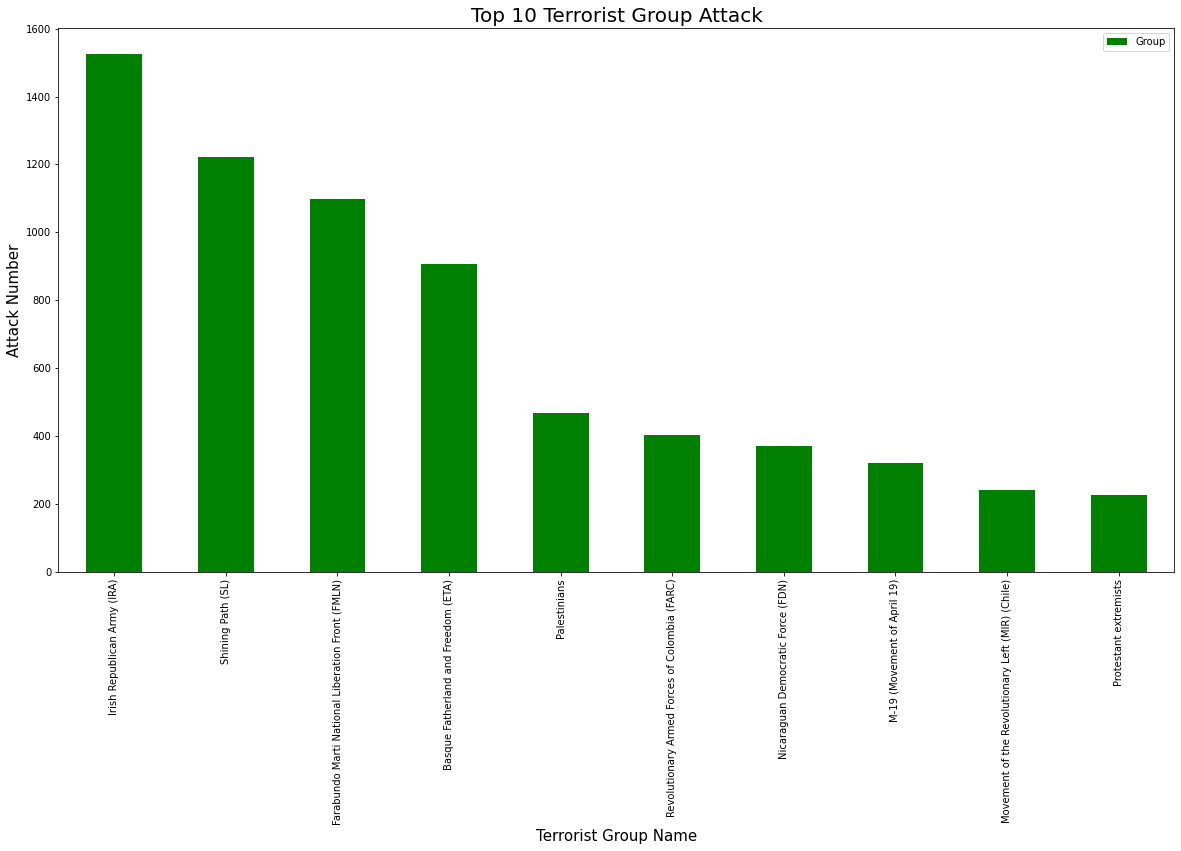

In [68]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind = 'bar' , figsize = (20,10) , color = 'Green')
plt.xlabel('Terrorist Group Name' , fontsize = 15)
plt.ylabel('Attack Number' , fontsize = 15)
plt.title('Top 10 Terrorist Group Attack' , fontsize = 20)
plt.show()

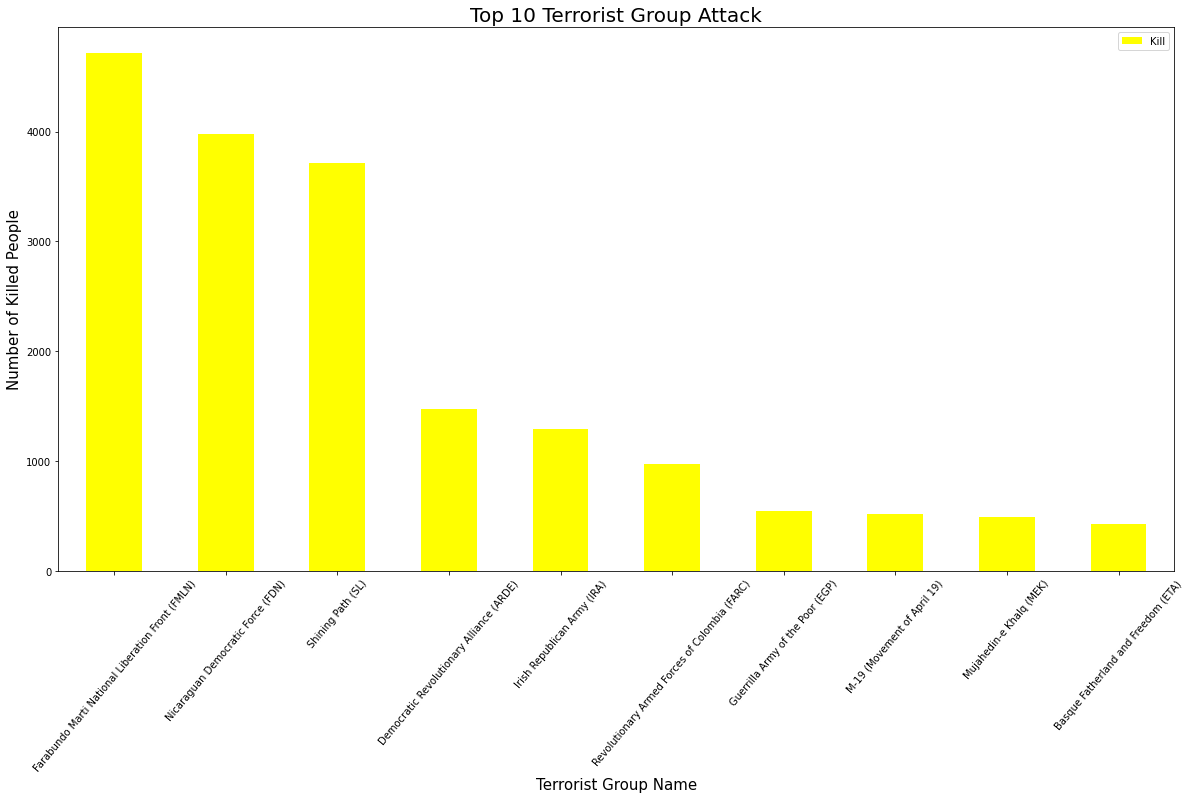

In [69]:
data[['Group' , 'Kill']].groupby(['Group'] , axis = 0).sum().drop('Unknown').sort_values('Kill' , ascending = False).head(10).plot(kind = 'bar' , color = 'Yellow' , figsize = (20,10) )
plt.xticks(rotation = 50)
plt.xlabel('Terrorist Group Name' , fontsize = 15)
plt.ylabel('Number of Killed People' , fontsize = 15)
plt.title('Top 10 Terrorist Group Attack' , fontsize = 20)
plt.show()

In [70]:
df = data[['Group' , 'Country' , 'Kill']]
df = df.groupby(['Group' , 'Country'] , axis = 0).sum().sort_values('Kill' , ascending = False).drop('Unknown').reset_index().head(10)
df

,Group,Country,Kill
0,Farabundo Marti National Liberation Front (FMLN),El Salvador,4705.0
1,Nicaraguan Democratic Force (FDN),Nicaragua,3964.0
2,Shining Path (SL),Peru,3711.0
3,Democratic Revolutionary Alliance (ARDE),Nicaragua,1473.0
4,Irish Republican Army (IRA),United Kingdom,1252.0
5,Revolutionary Armed Forces of Colombia (FARC),Colombia,972.0
6,Guerrilla Army of the Poor (EGP),Guatemala,538.0
7,M-19 (Movement of April 19),Colombia,518.0
8,Mujahedin-e Khalq (MEK),Iran,490.0
9,Basque Fatherland and Freedom (ETA),Spain,423.0


In [71]:
kill = data.loc[: , 'Kill']
print('Number of People Killed by Terror Attack : ' , int(sum(kill.dropna())))

Number of People Killed by Terror Attack :  38237


In [72]:
typekill = data.pivot_table(columns = 'AttackType' , values = 'Kill' , aggfunc = 'sum')
typekill

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,22180.0,4696.0,7646.0,673.0,193.0,244.0,449.0,19.0,2137.0


In [73]:
countrykill = data.pivot_table(columns = 'Country' , values = 'Kill' , aggfunc = 'sum')
countrykill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,Barbados,Belgium,Belize,Bolivia,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Canada,Central African Republic,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,Falkland Islands,France,...,Qatar,Rhodesia,Saudi Arabia,Senegal,Seychelles,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Tunisia,Turkey,Uganda,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
Kill,53.0,0.0,0.0,0.0,351.0,331.0,6.0,13.0,0.0,0.0,12.0,73.0,12.0,0.0,13.0,1.0,55.0,0.0,2.0,1.0,4.0,3.0,3.0,0.0,76.0,2064.0,11.0,24.0,26.0,0.0,5.0,3.0,11.0,1.0,9.0,73.0,8478.0,135.0,0.0,133.0,...,1.0,217.0,5.0,0.0,0.0,0.0,1.0,110.0,3.0,81.0,0.0,4.0,588.0,120.0,310.0,0.0,0.0,7.0,50.0,467.0,25.0,1.0,191.0,0.0,41.0,339.0,426.0,121.0,2163.0,227.0,4.0,0.0,46.0,65.0,70.0,0.0,6.0,3.0,5.0,59.0
